In [1]:
import pandas as pd
data = pd.read_csv('iris.csv',delimiter =',')

In [2]:
data.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#if column nmaes are not given then use below commands to read the datasets
import pandas as pd
data1 = pd.read_csv('iris.data',delimiter =',',names = ['sepal length','sepal width','petal length','petal width','class'])


In [4]:
data1.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


DBSCAN is an unsupervised method that clusters core samples (dense area of a datasets) and denotes non core samples (sparse portions of datasets)

Use to identify collective outliers

outliers should make up <= 5% of total observations------adjust model parameters accordingly


Important DBSCAN model parameters:

1.Eps:the maximum distance between the two samples for them to be clustered in the same neighbourhood(start at eps=0.1)
2.min_samples:the minimum number of samples in a neighbourhood for a data point to qualify as a core point (starts with very low  sample size)


in  dbscan clustering technique, we create a cirle from each datapoints with  radius equal to eps and if within that circle with datpoints number of min_samples/points exceed it it is termed as core point,if it is less than min_points but constitute a core point ,it is called border point else it is a noise point.

In [5]:
import pandas as pd
import seaborn as sb
from pylab import rcParams
import matplotlib.pyplot as plt

import sklearn
from sklearn.cluster import DBSCAN
from collections import Counter

In [6]:
%matplotlib inline
rcParams['figure.figsize']= 5,4
sb.set_style('whitegrid')

In [7]:
model = DBSCAN(eps=.8,min_samples=19)
print(model)

DBSCAN(algorithm='auto', eps=0.8, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=19, n_jobs=1, p=None)


In [8]:
df = data.iloc[:,0:4]
df1 =data.iloc[:,4]
print(df)
print(df1)

     sepal length  sepal width  petal length  petal width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
5             5.4          3.9           1.7          0.4
6             4.6          3.4           1.4          0.3
7             5.0          3.4           1.5          0.2
8             4.4          2.9           1.4          0.2
9             4.9          3.1           1.5          0.1
10            5.4          3.7           1.5          0.2
11            4.8          3.4           1.6          0.2
12            4.8          3.0           1.4          0.1
13            4.3          3.0           1.1          0.1
14            5.8          4.0           1.2          0.2
15            5.7          4.4           1.5          0.4
16            

In [9]:
model = DBSCAN(eps=.8,min_samples=19).fit(df)
print(model)

DBSCAN(algorithm='auto', eps=0.8, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=19, n_jobs=1, p=None)


In [10]:
outliers_df=pd.DataFrame(df)
print  (Counter(model.labels_))
print(outliers_df[model.labels_==-1])

Counter({1: 94, 0: 50, -1: 6})
     sepal length  sepal width  petal length  petal width
98            5.1          2.5           3.0          1.1
105           7.6          3.0           6.6          2.1
117           7.7          3.8           6.7          2.2
118           7.7          2.6           6.9          2.3
122           7.7          2.8           6.7          2.0
131           7.9          3.8           6.4          2.0


In [11]:
%matplotlib inline
import pandas as pd

import seaborn as sb
from pylab import rcParams
import matplotlib.pyplot as plt

Text(0.5,1,'DBSCAN for outliers')

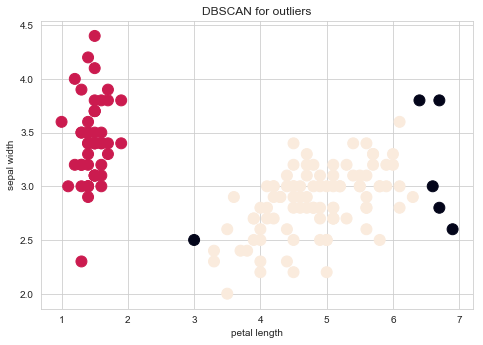

In [12]:
fig=plt.figure()
ax=fig.add_axes([.1,.1,1,1])
colors=model.labels_
x=df.iloc[:,2]
y=df.iloc[:,1]
ax.set_xlabel('petal length')
ax.set_ylabel('sepal width')
ax.scatter(x,y,c=colors,s=120)
plt.title("DBSCAN for outliers")

In [19]:
import pickle

In [20]:
with open('model_pickle','wb') as f:
    pickle.dump(model,f)

In [22]:
with open('model_pickle','rb') as f:
    mb=pickle.load(f)
    

In [25]:
from sklearn.externals import joblib

In [26]:
joblib.dump(model,'model_joblib')

['model_joblib']

In [27]:
mj=joblib.load('model_joblib')

In [40]:
mj.algorithm

'auto'

In [41]:
mj.fit

<bound method DBSCAN.fit of DBSCAN(algorithm='auto', eps=0.8, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=19, n_jobs=1, p=None)>